In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from pathlib import Path
import pandas as pd
import numpy as np
import math

import seaborn as sns

from downstream.signals.signal_r2_permutation_test import process, collect_paths

/Users/romeo/anaconda/envs/aging3/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
# simulations = 6
simulations = 100001
threads = 8

# Histone modifications

In [2]:
datatype_loci = {
    "H3K4me1": ["cd14v2_chromhmm18.hg19.8_EnhG2", "cd14v2_chromhmm18.hg19.9_EnhA1"],
    "H3K4me3": ["cd14v2_chromhmm18.hg19.1_TssA", "cd14v2_chromhmm18.hg19.2_TssFlnk"],
    "H3K27ac": ["cd14v2_chromhmm18.hg19.1_TssA", "cd14v2_chromhmm18.hg19.3_TssFlnkU"],
    "H3K36me3": ["cd14v2_chromhmm18.hg19.5_Tx", "cd14v2_chromhmm18.hg19.7_EnhG1",
                 "cd14v2_chromhmm18.hg19.8_EnhG2",
                 "coding_transcript", "noncoding_transcript"],
    "H3K27me3": ["cd14v2_chromhmm18.hg19.14_TssBiv", "cd14v2_chromhmm18.hg19.15_EnhBiv",
                 "cd14v2_chromhmm18.hg19.16_ReprPC"],
    "meth" : ["ucsc_cpgIslandExt.hg19", "cpg_minavcov10_complex_4outliers.narrow.adjusted.regions.filtered"]
}
for dt, loci in datatype_loci.items():
    loci.append("random1000x10000")
    loci.append("hg19_100000")
    if dt.startswith("H"):
        loci.append("coding_tss[-2000..2000]")
        loci.append("{}_zinbra_median_consensus".format(dt))
        loci.append("{}_zinbra_weak_consensus".format(dt))
        
signals_root = Path("/mnt/stripe/bio/experiments/signal_experiments")

In [3]:
folders = [signals_root / dt / loci for dt in sorted(datatype_loci.keys()) for loci in datatype_loci[dt]]
print("Loci folders: ", *[str(p) for p in folders], sep="\n  ")

paths = [p for folder in folders for p in collect_paths(folder)]
print("Paths: ", len(paths))

Loci folders: 
  /mnt/stripe/bio/experiments/signal_experiments/H3K27ac/cd14v2_chromhmm18.hg19.1_TssA
  /mnt/stripe/bio/experiments/signal_experiments/H3K27ac/cd14v2_chromhmm18.hg19.3_TssFlnkU
  /mnt/stripe/bio/experiments/signal_experiments/H3K27ac/random1000x10000
  /mnt/stripe/bio/experiments/signal_experiments/H3K27ac/hg19_100000
  /mnt/stripe/bio/experiments/signal_experiments/H3K27ac/H3K27ac_zinbra_median_consensus
  /mnt/stripe/bio/experiments/signal_experiments/H3K27ac/H3K27ac_zinbra_weak_consensus
  /mnt/stripe/bio/experiments/signal_experiments/H3K27me3/cd14v2_chromhmm18.hg19.14_TssBiv
  /mnt/stripe/bio/experiments/signal_experiments/H3K27me3/cd14v2_chromhmm18.hg19.15_EnhBiv
  /mnt/stripe/bio/experiments/signal_experiments/H3K27me3/cd14v2_chromhmm18.hg19.16_ReprPC
  /mnt/stripe/bio/experiments/signal_experiments/H3K27me3/random1000x10000
  /mnt/stripe/bio/experiments/signal_experiments/H3K27me3/hg19_100000
  /mnt/stripe/bio/experiments/signal_experiments/H3K27me3/H3K27me3_zin

In [4]:
output_path = signals_root / "validate.norms.permutation_r2.{}.csv".format(simulations)
output_path

print(str(output_path), "[exists]" if output_path.exists() else "[not exists]")

/mnt/stripe/bio/experiments/signal_experiments/validate.norms.permutation_r2.100001.csv [exists]


In [5]:
if not output_path.exists():
    process(paths, str(output_path), seed=100, simulations=simulations, threads=threads)
print("Results file: ", str(output_path))

Results file:  /mnt/stripe/bio/experiments/signal_experiments/validate.norms.permutation_r2.100001.csv


In [6]:
df = pd.DataFrame.from_csv(output_path, index_col=None)
df["loci"] = [Path(f).name for f in df["file"]]
print("Shape:", df.shape)
df.head(10)

Shape: (333, 10)


,modification,file,normalization,mean,median,p2,p5,p10,wdist,loci
0,H3K27ac,/mnt/stripe/bio/experiments/signal_experiments...,frip,0.922315,0.968264,0.540931,0.723086,0.811906,0.163025,H3K27ac_zinbra_median_consensus
1,H3K27ac,/mnt/stripe/bio/experiments/signal_experiments...,fripm,0.992428,0.993499,0.980297,0.983789,0.986720,0.008712,H3K27ac_zinbra_median_consensus
2,H3K27ac,/mnt/stripe/bio/experiments/signal_experiments...,fripq,0.993653,0.994483,0.984326,0.986825,0.989122,0.007230,H3K27ac_zinbra_median_consensus
3,H3K27ac,/mnt/stripe/bio/experiments/signal_experiments...,fripz,0.993392,0.994309,0.983192,0.986016,0.988584,0.007588,H3K27ac_zinbra_median_consensus
4,H3K27ac,/mnt/stripe/bio/experiments/signal_experiments...,raw,0.930657,0.970846,0.590816,0.750969,0.831836,0.141702,H3K27ac_zinbra_median_consensus
5,H3K27ac,/mnt/stripe/bio/experiments/signal_experiments...,rawq,0.994338,0.995096,0.985821,0.988172,0.990207,0.006462,H3K27ac_zinbra_median_consensus
6,H3K27ac,/mnt/stripe/bio/experiments/signal_experiments...,rawz,0.994043,0.994858,0.984609,0.987458,0.989604,0.006846,H3K27ac_zinbra_median_consensus
7,H3K27ac,/mnt/stripe/bio/experiments/signal_experiments...,rpkm,0.633231,0.823931,-0.917134,-0.216881,0.155801,0.706185,H3K27ac_zinbra_median_consensus
8,H3K27ac,/mnt/stripe/bio/experiments/signal_experiments...,rpm,0.932010,0.969384,0.605086,0.751339,0.836483,0.134981,H3K27ac_zinbra_median_consensus
9,H3K27ac,/mnt/stripe/bio/experiments/signal_experiments...,scores,0.990911,0.992606,0.971444,0.978614,0.983778,0.011069,H3K27ac_zinbra_median_consensus


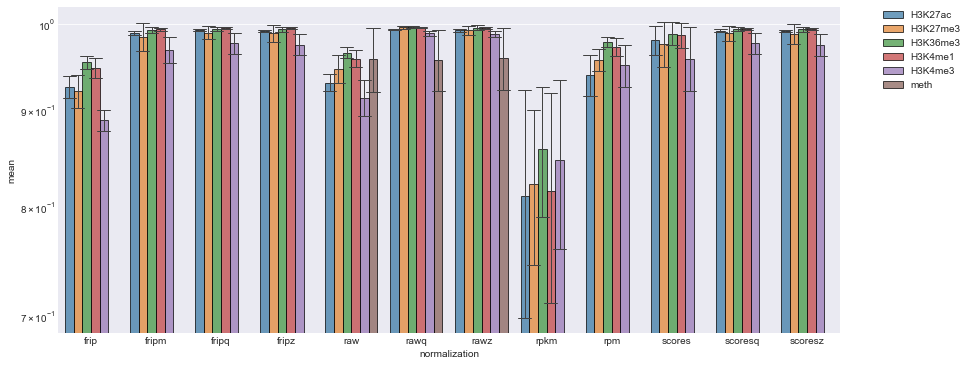

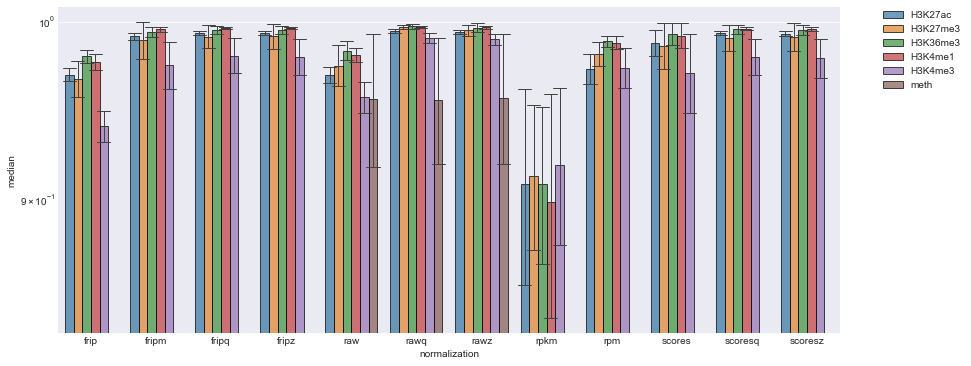

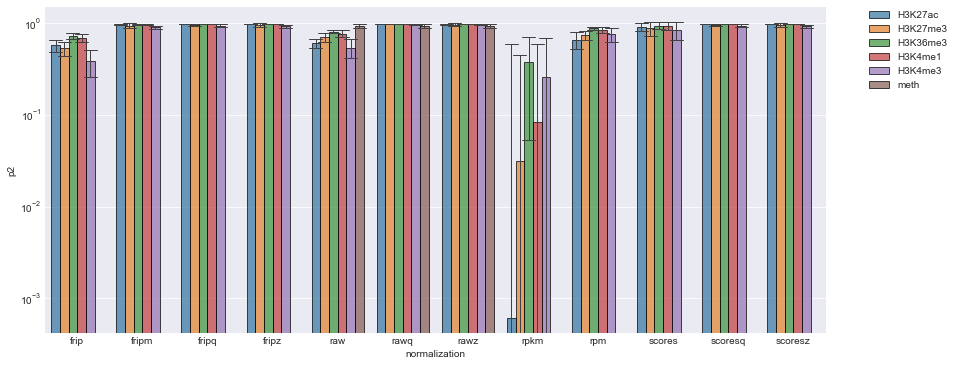

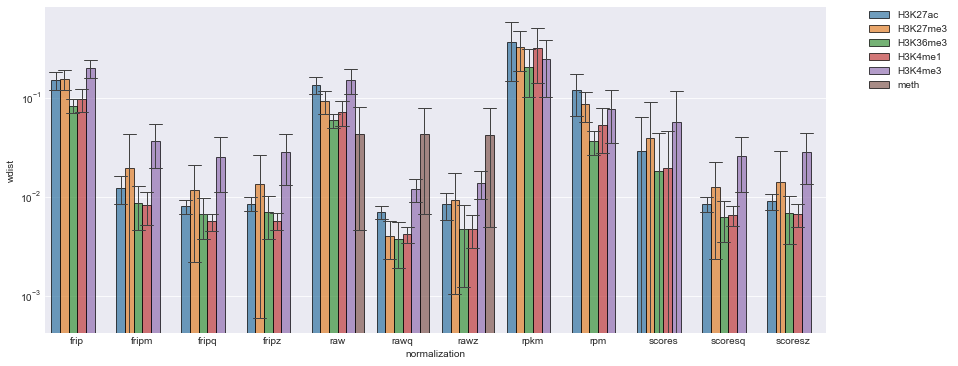

In [7]:
for metric in ["mean", "median", "p2", "wdist"]:
    plt.figure(figsize=(14, 6))
    g = sns.barplot(data=df, y=metric, x="normalization",
                    hue="modification", #order=sorted(datatype_loci.keys()),
                    ci="sd", capsize=.2, errwidth=1, # error bars
                    #color="lightgray", 
                    alpha=0.7,
                    edgecolor="black")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    g.set_yscale('log')

    plt.show()

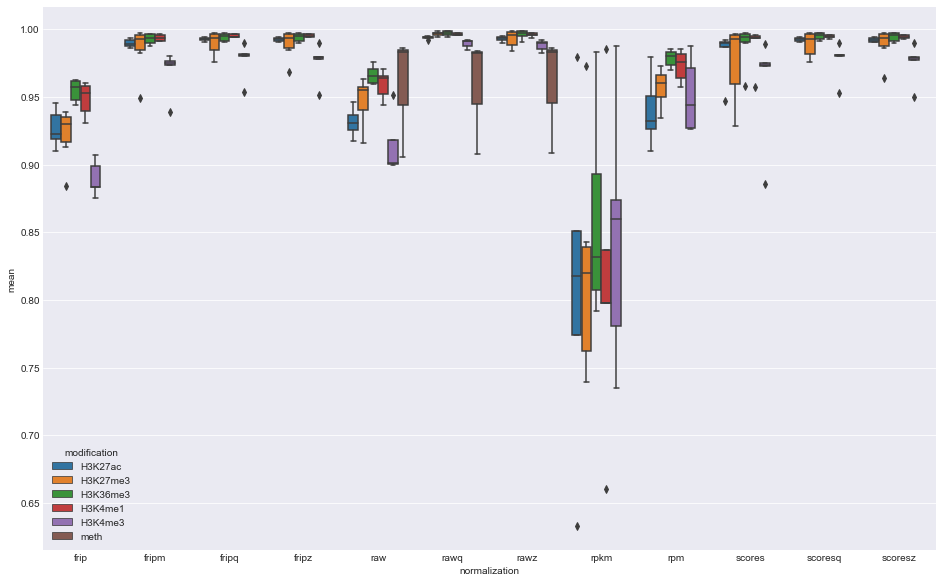

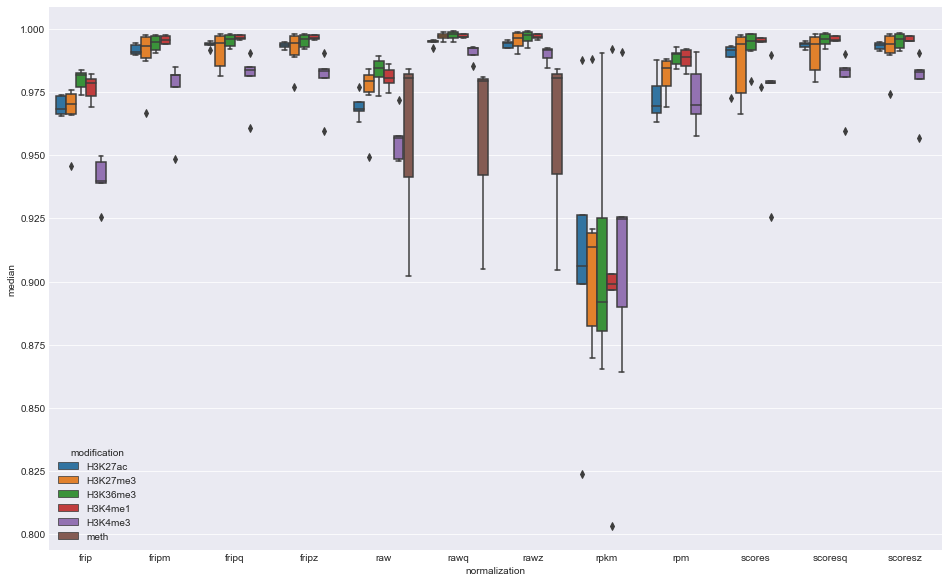

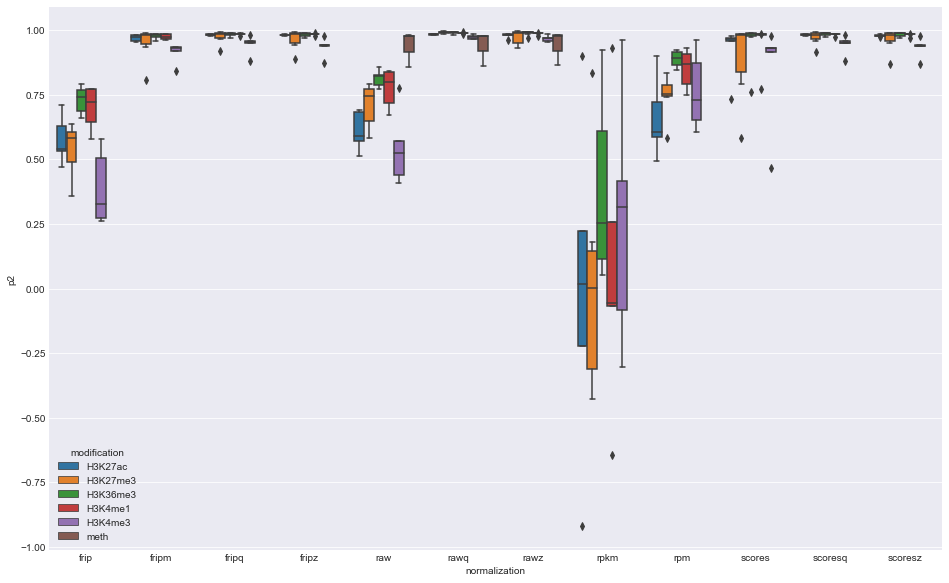

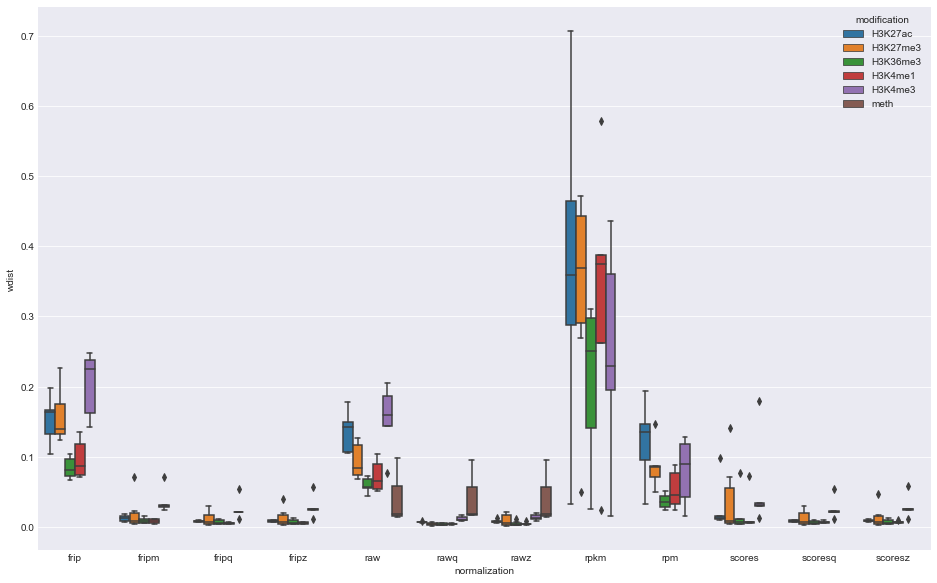

In [8]:
for metric in ["mean", "median", "p2", "wdist"]:
    plt.figure(figsize=(16, 10))
    ax = sns.boxplot(data=df, y=metric, hue="modification", x="normalization")
    plt.show()

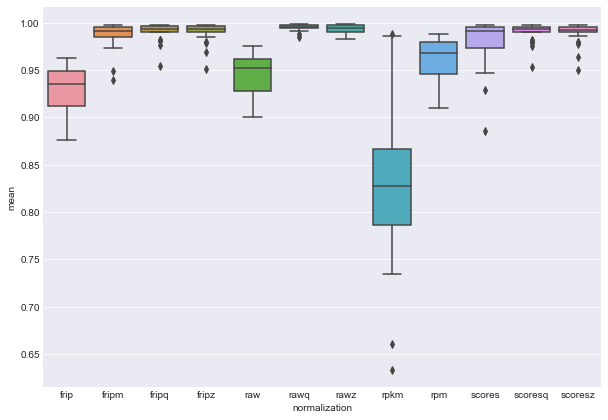

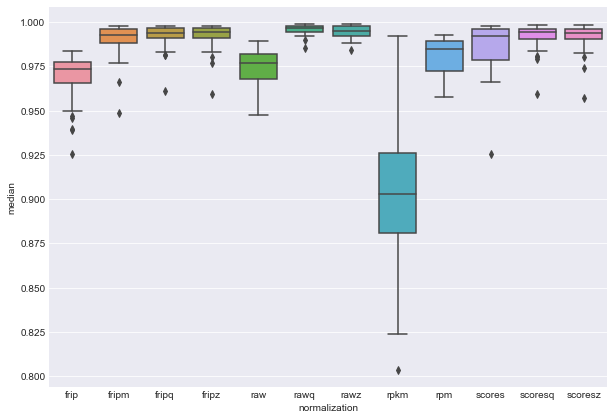

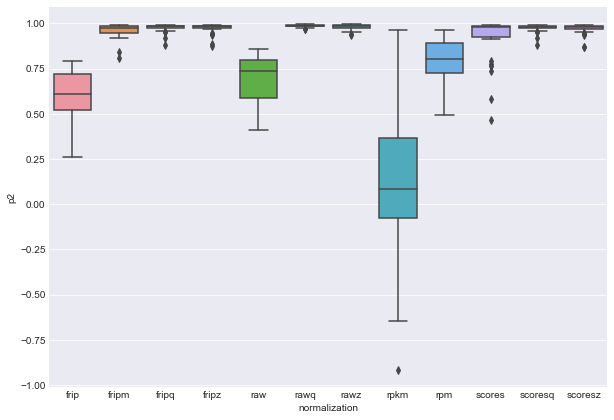

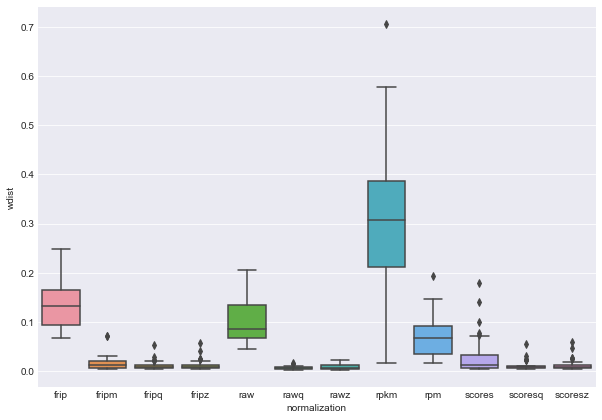

In [9]:
for metric in ["mean", "median", "p2", "wdist"]:
    plt.figure(figsize=(10, 7))
    ax = sns.boxplot(data=df[df.modification != "meth"], 
                     y=metric, x="normalization")
    plt.show()

In [10]:
# plt.figure(figsize=(20,10))
# g = sns.boxplot(data=df, y="mean", x="modification", hue="normalization")
# plt.show()

/Users/romeo/anaconda/envs/aging3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


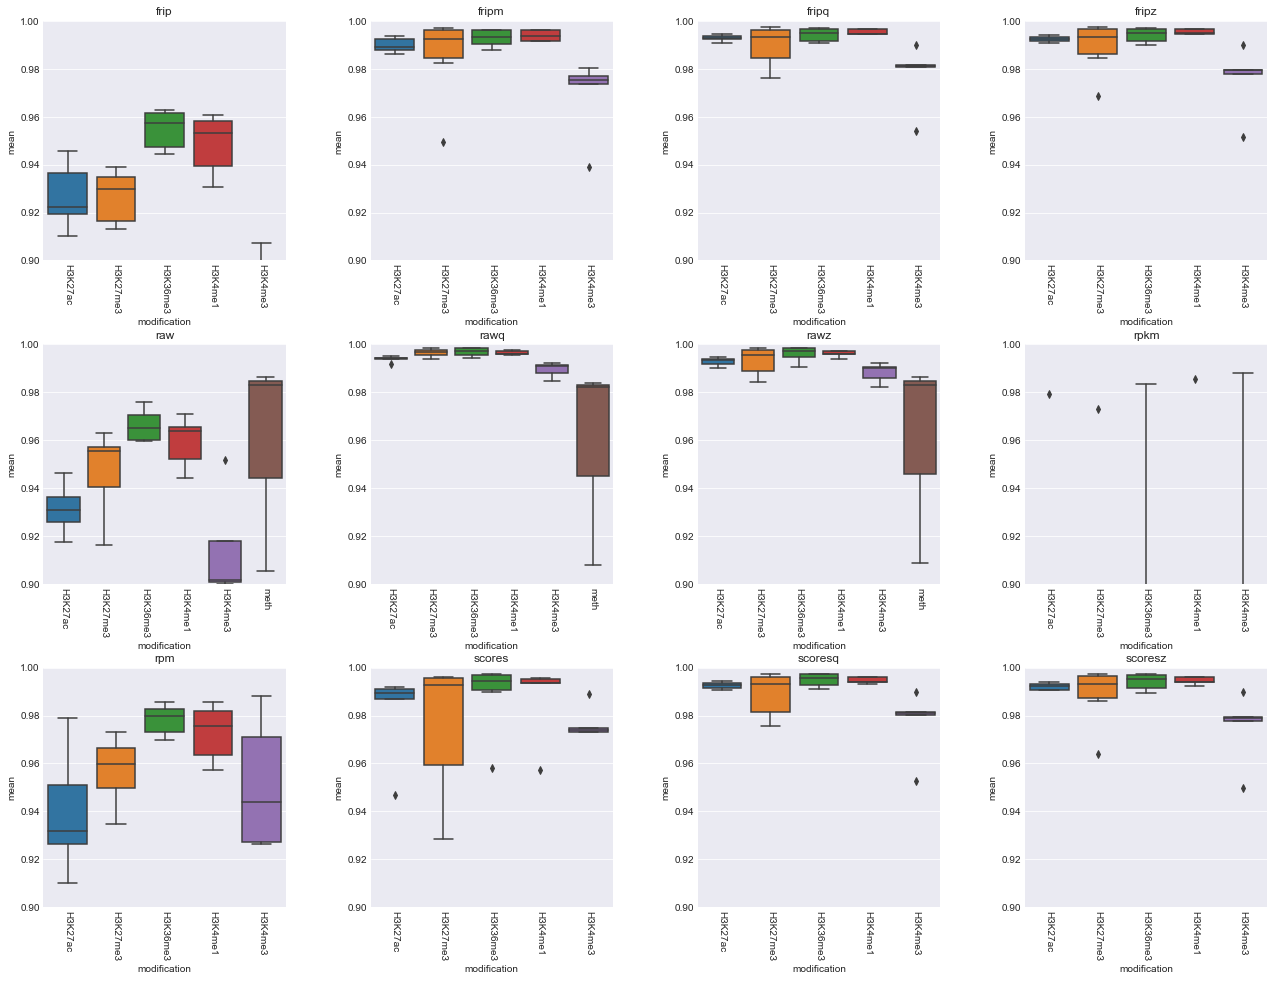

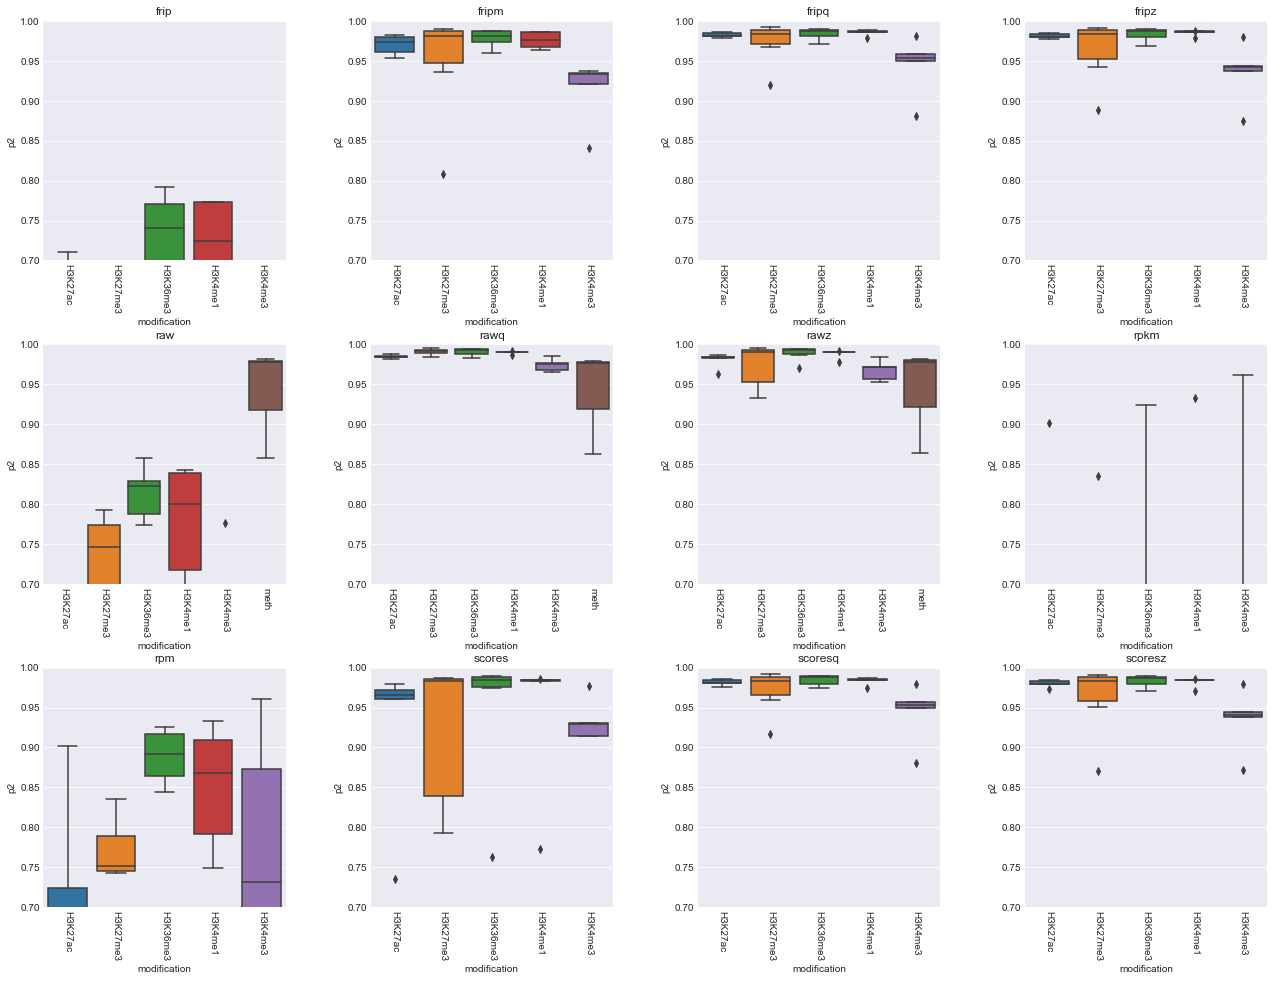

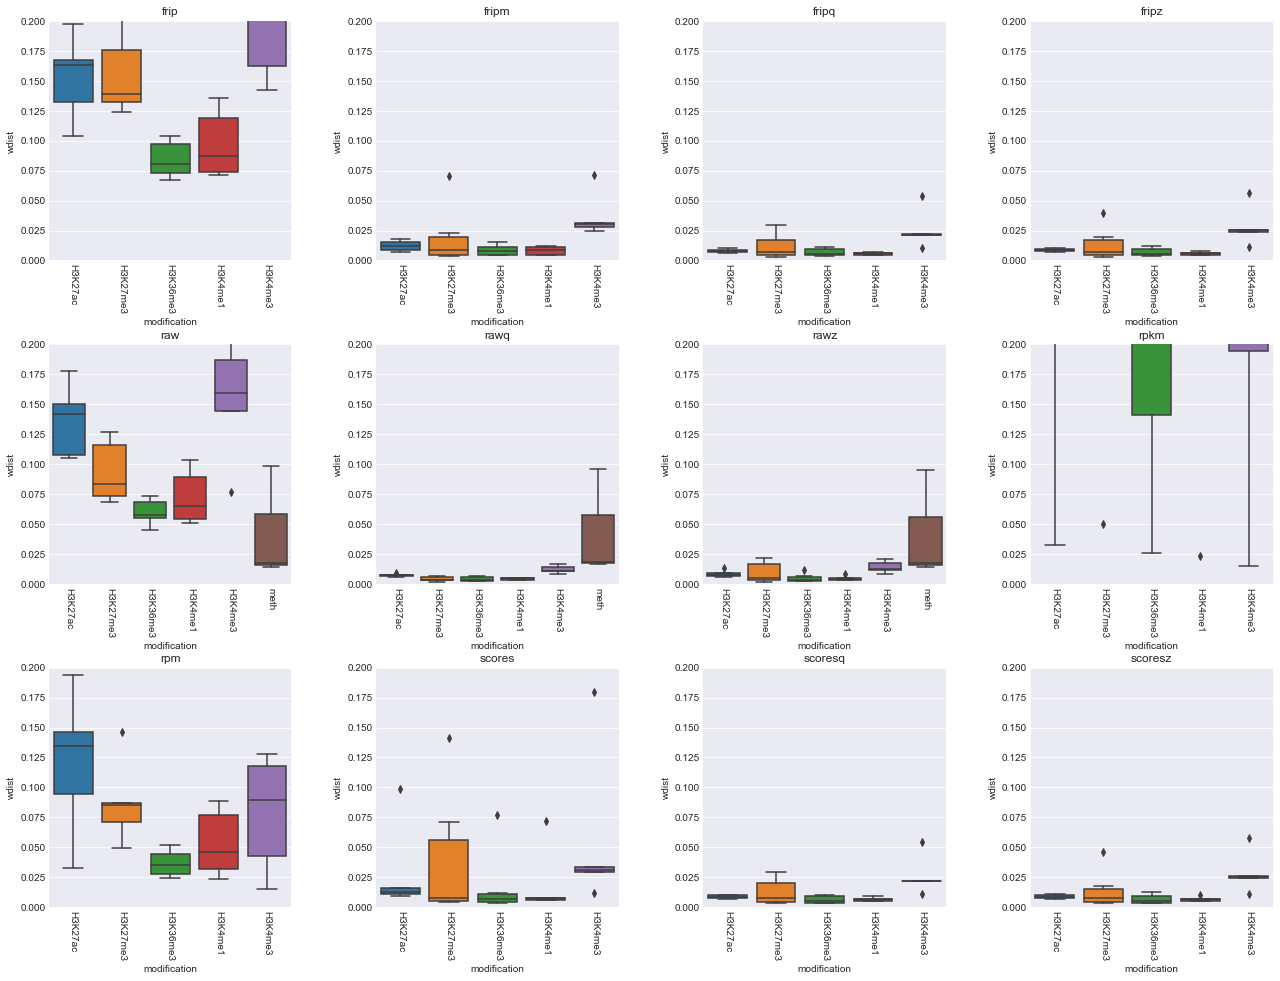

In [11]:
norms = sorted(set(df["normalization"]))
n_subplots = math.ceil(np.sqrt(len(norms)))
for metric, ylim in [("mean", (0.9, 1.0)), ("p2", (0.7, 1.0)), ("wdist", (0, 0.2))]:
    plt.figure(figsize=(n_subplots*5, n_subplots*5))
    
    for i, norm in enumerate(norms, 1):
        ax = plt.subplot(n_subplots, n_subplots, i)
        g = sns.boxplot(data=df[df["normalization"] == norm], y=metric, x="modification",
                        ax=ax)
        for item in g.get_xticklabels():
            item.set_rotation(-90)
        ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        ax.set_title(norm)
        ax.set_ylim(ylim)
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35, wspace=0.35)
    plt.show()


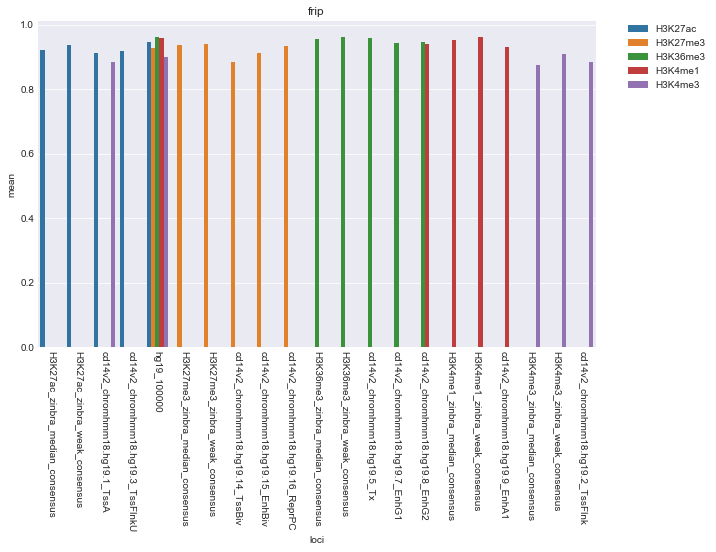

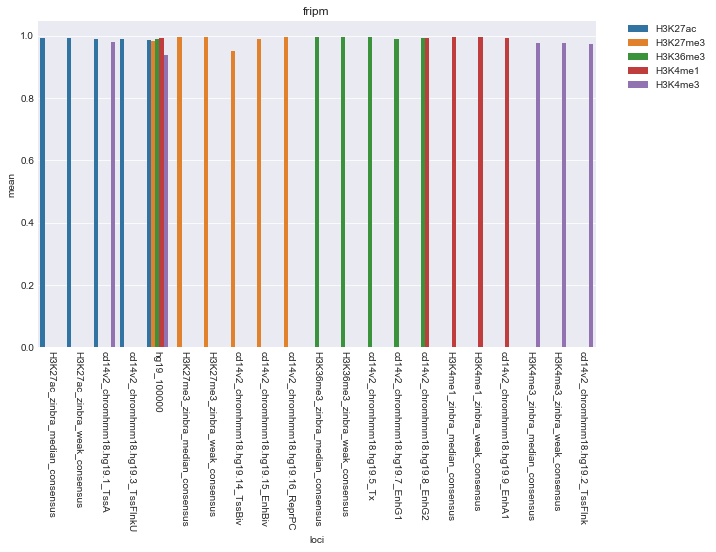

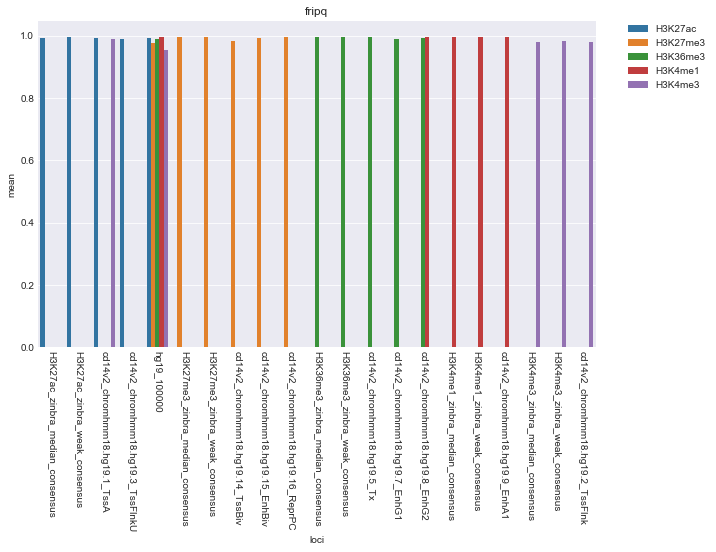

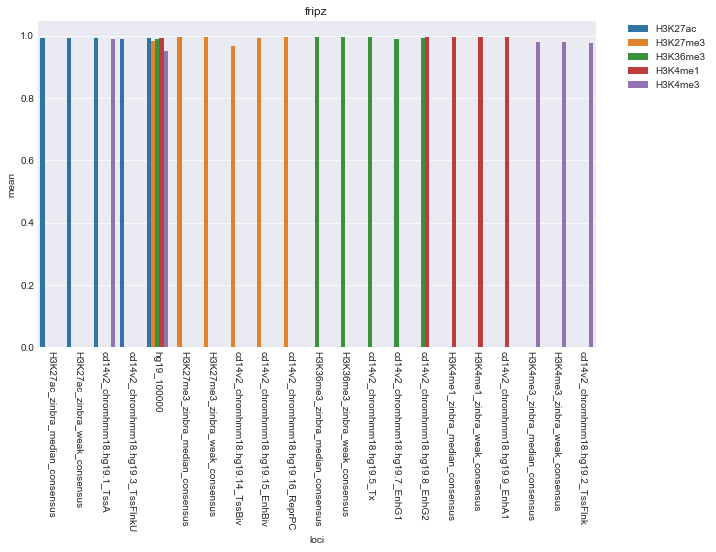

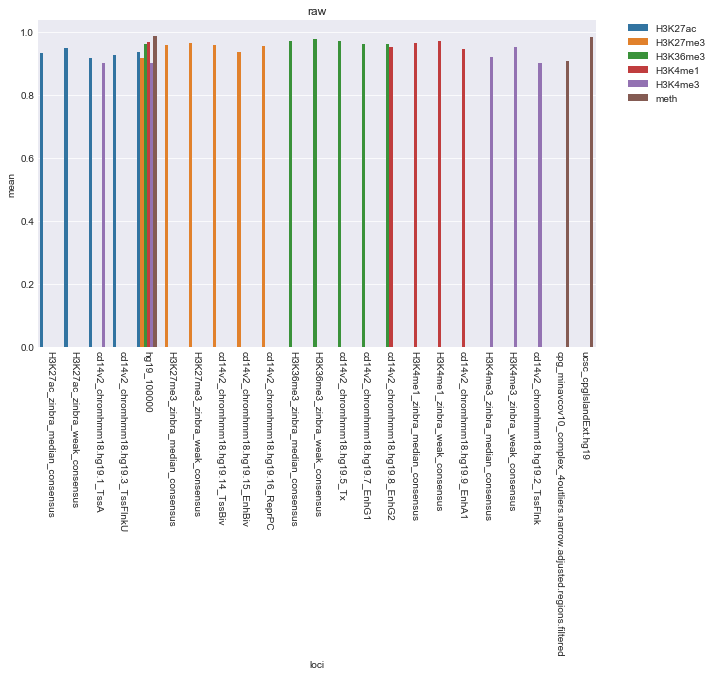

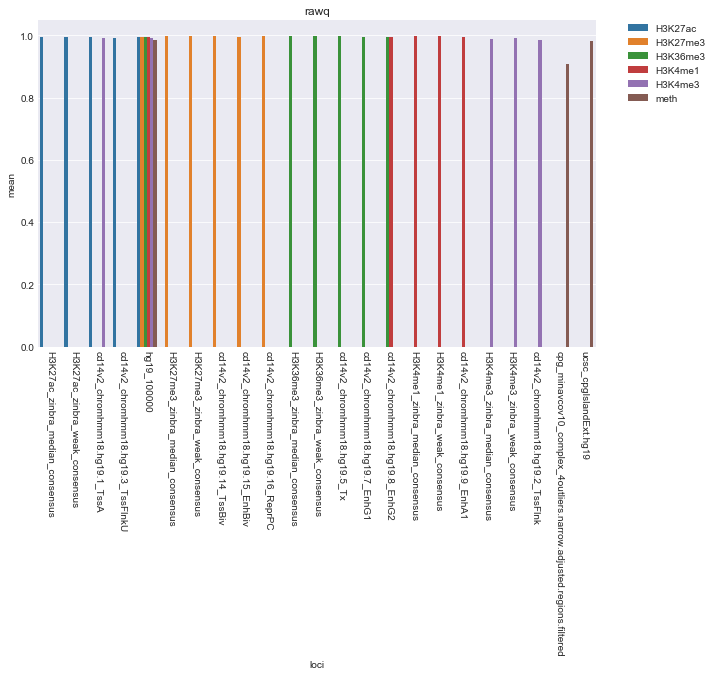

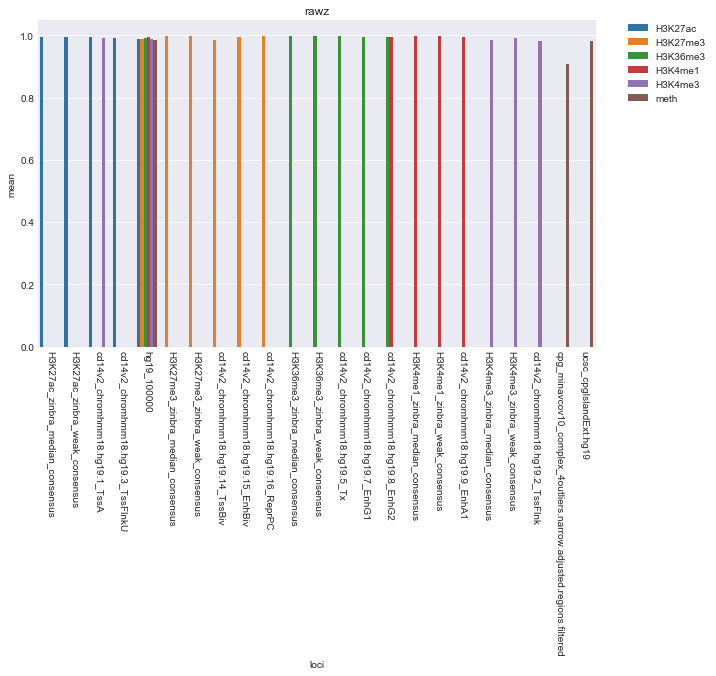

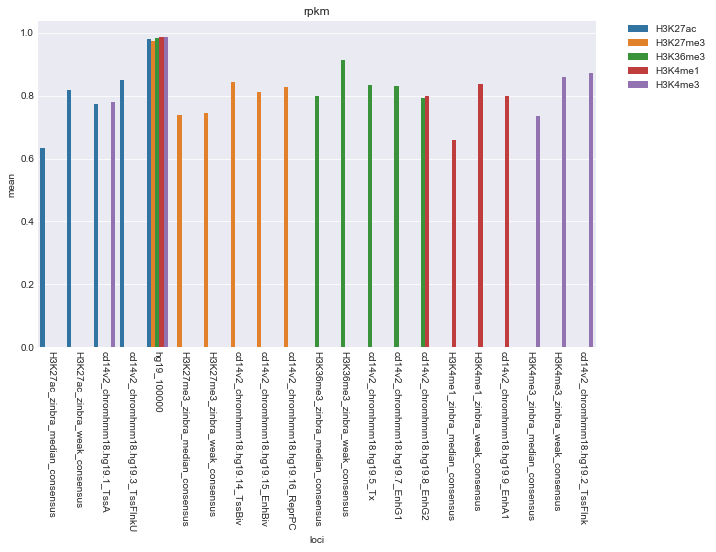

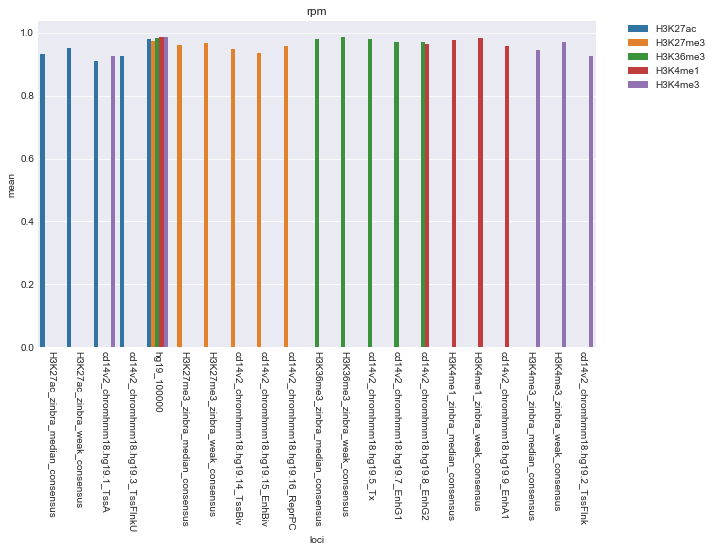

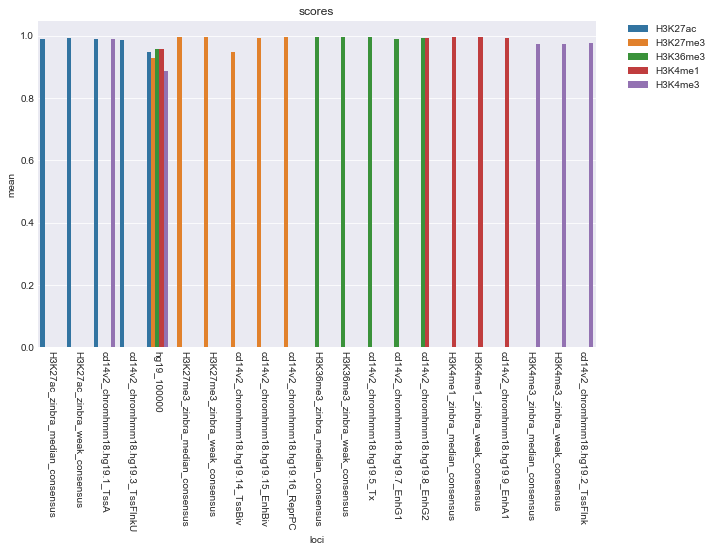

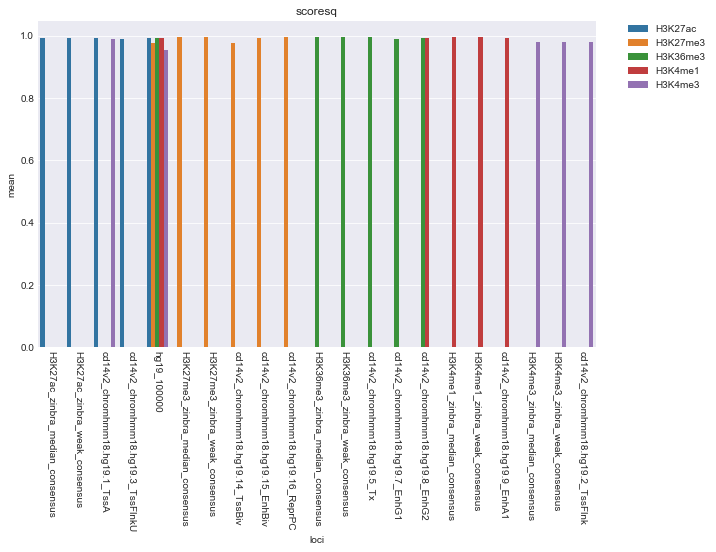

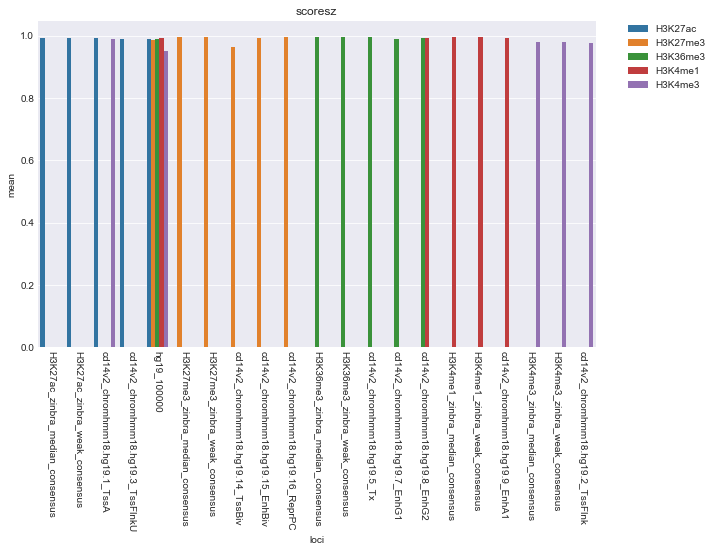

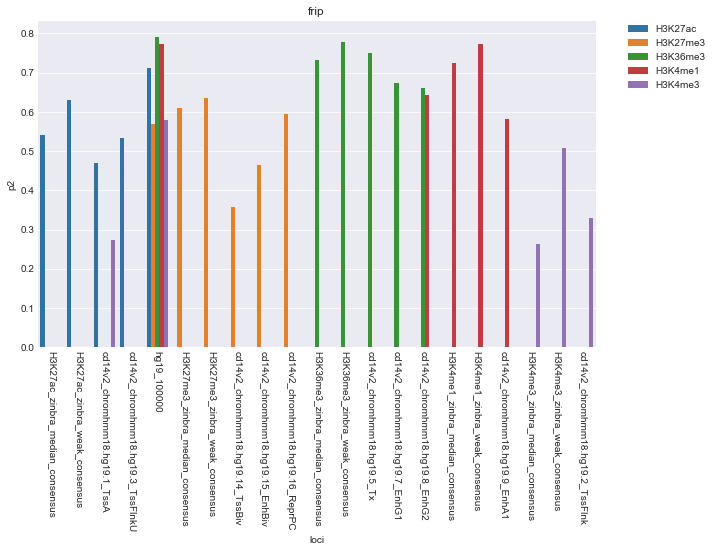

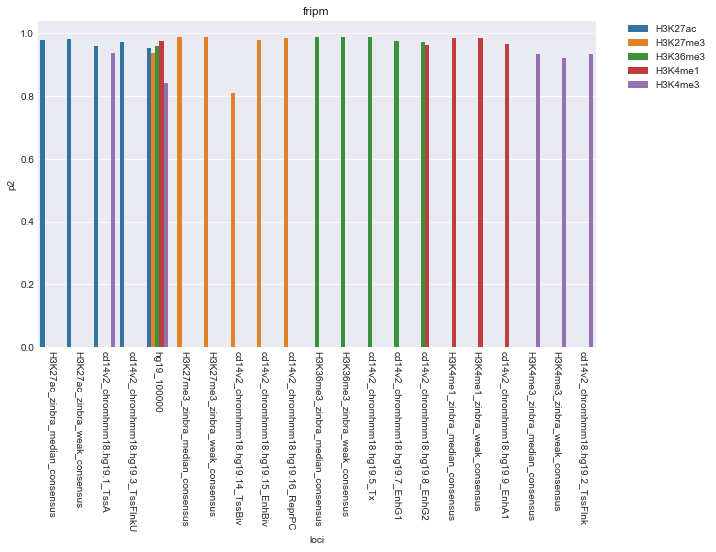

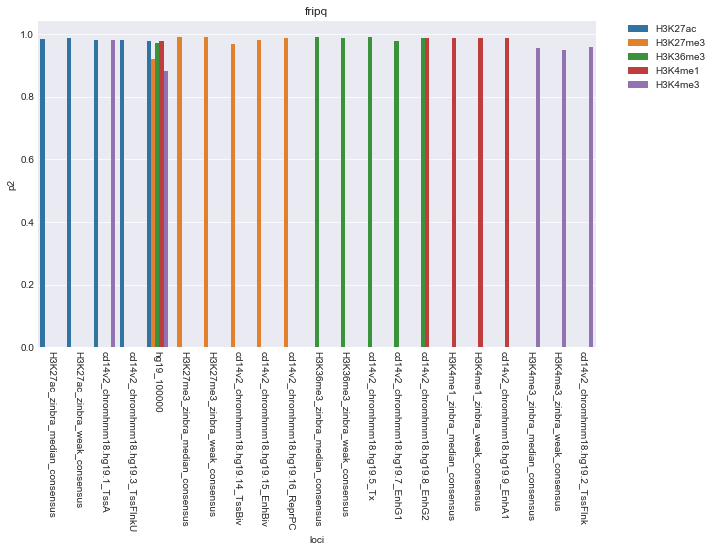

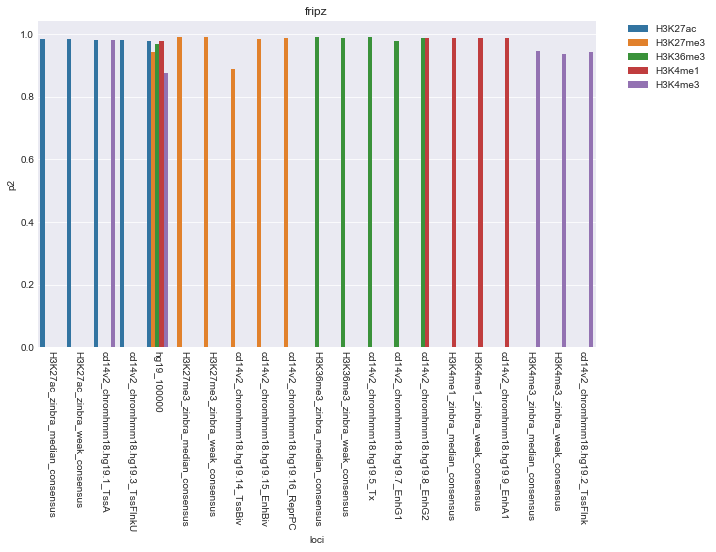

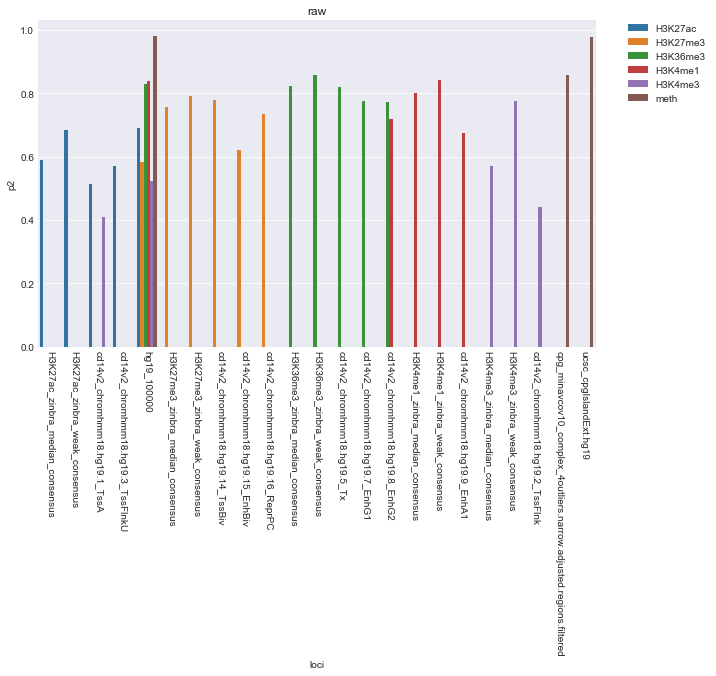

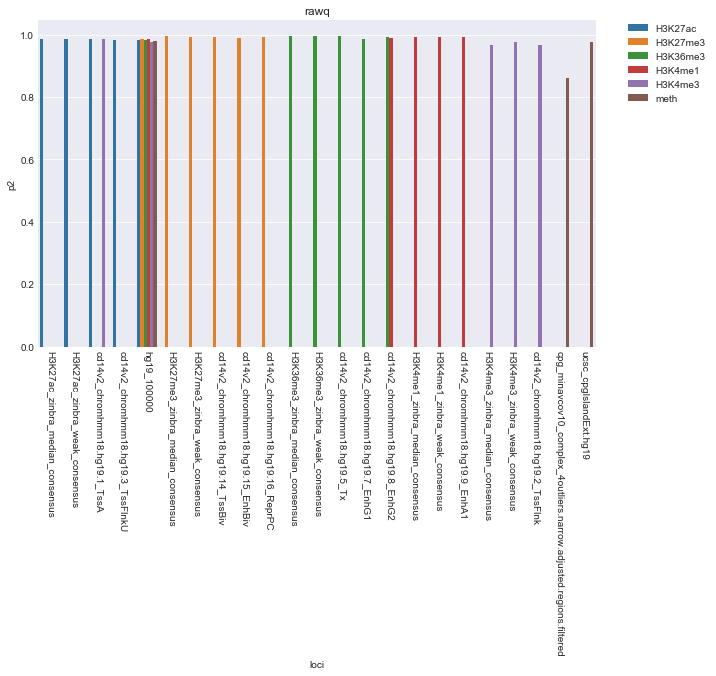

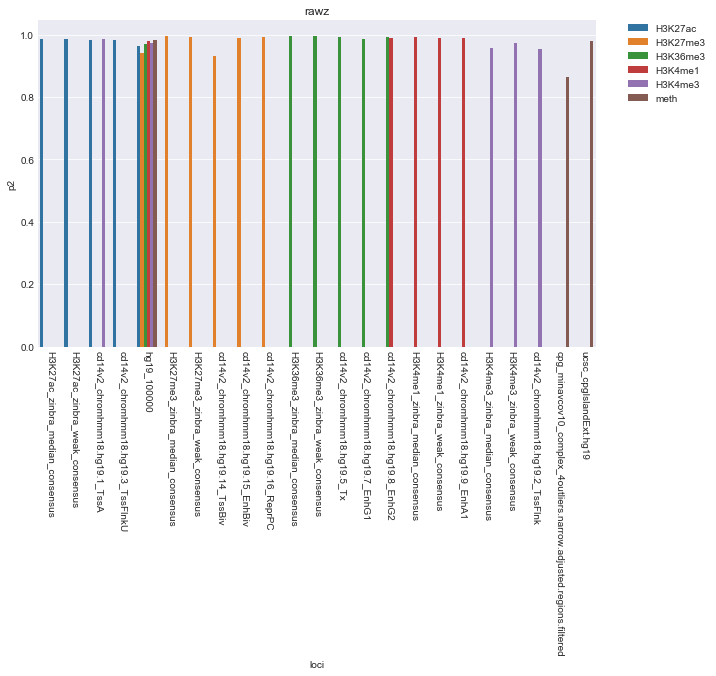

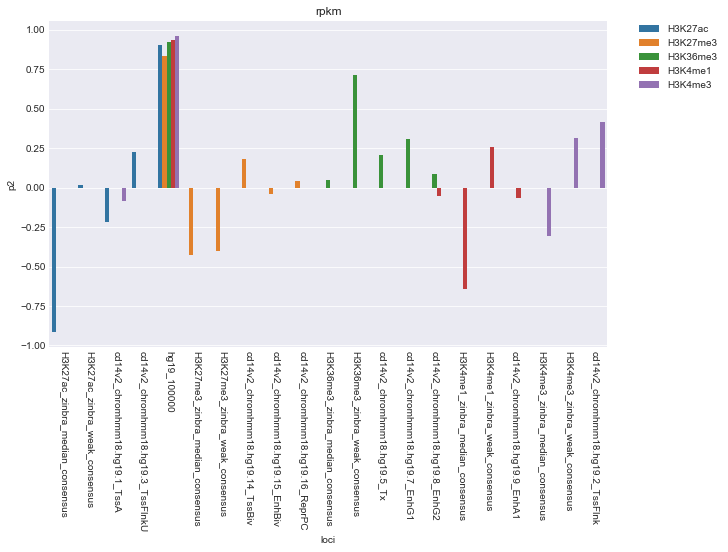

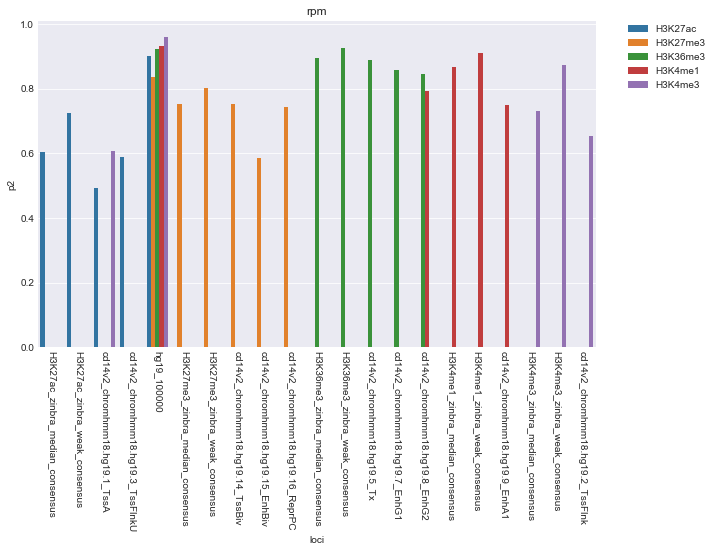

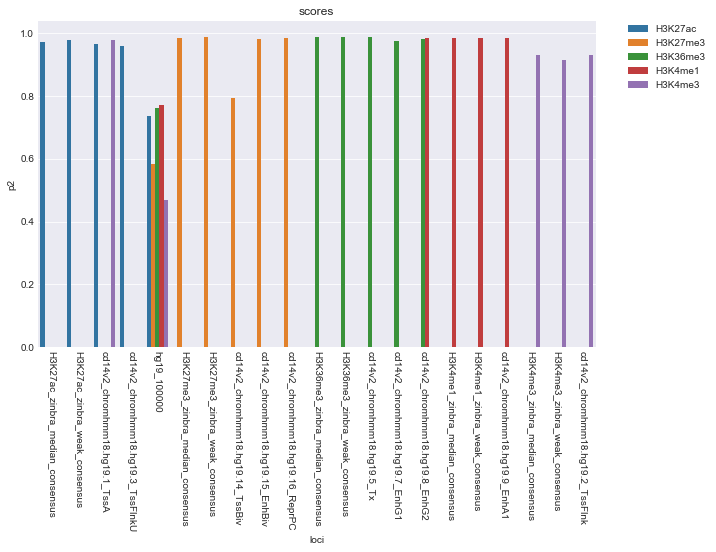

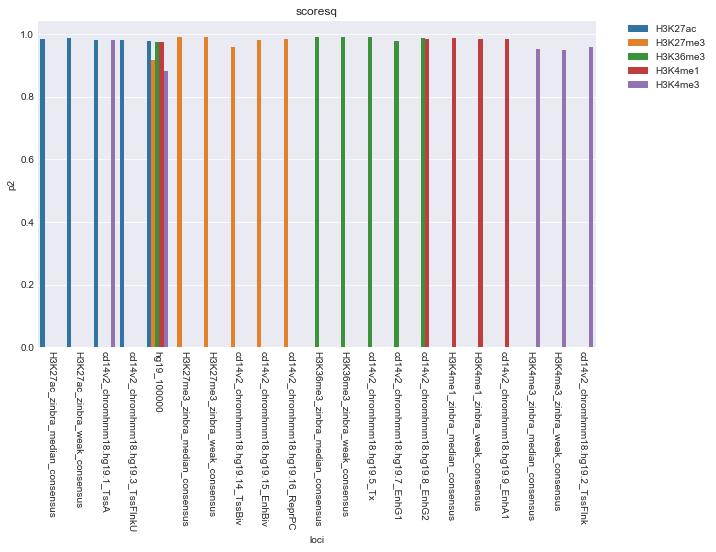

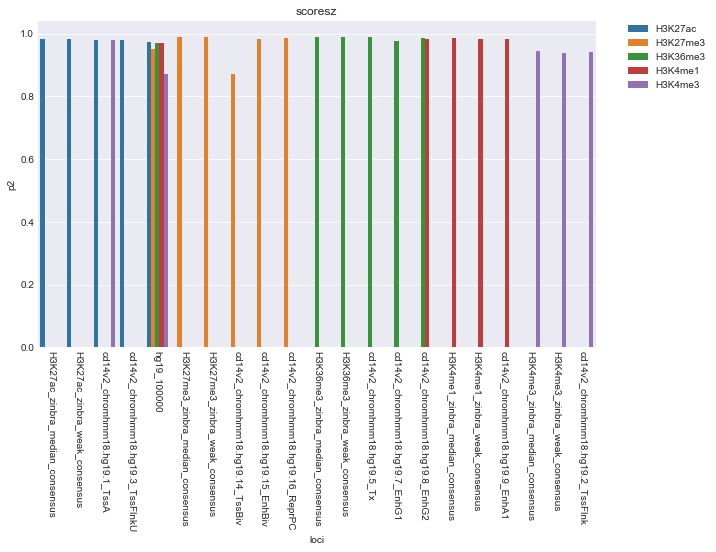

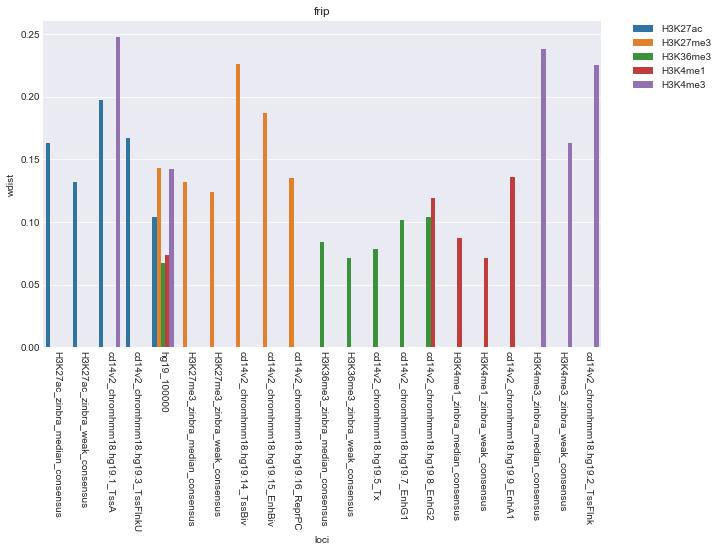

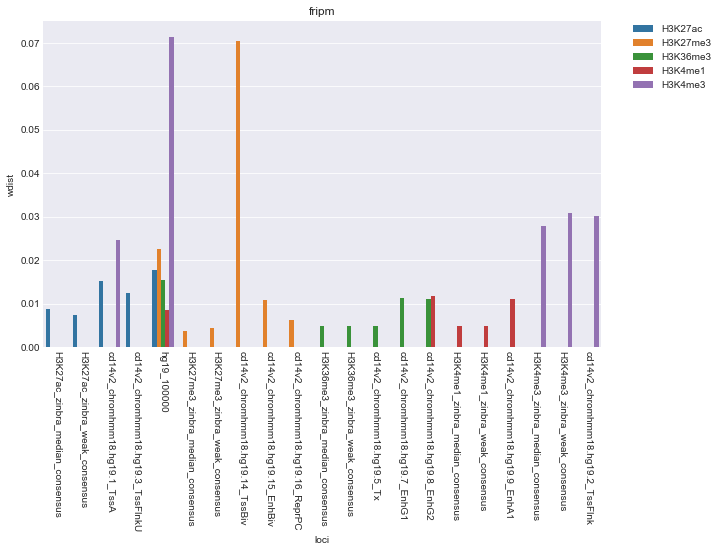

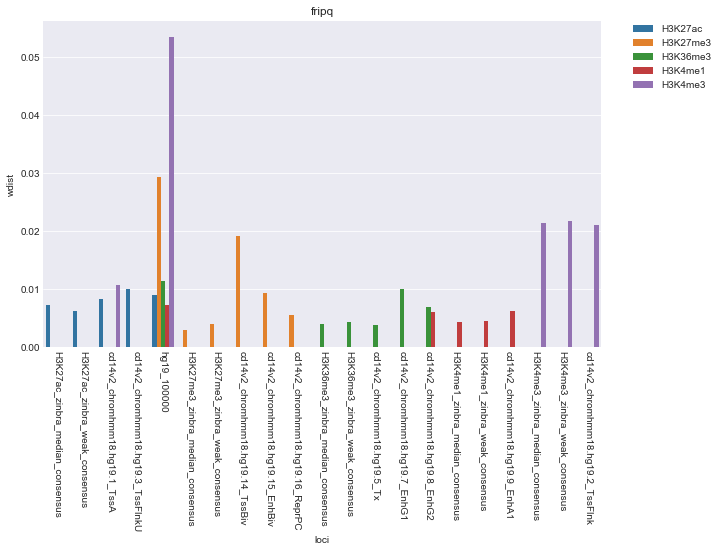

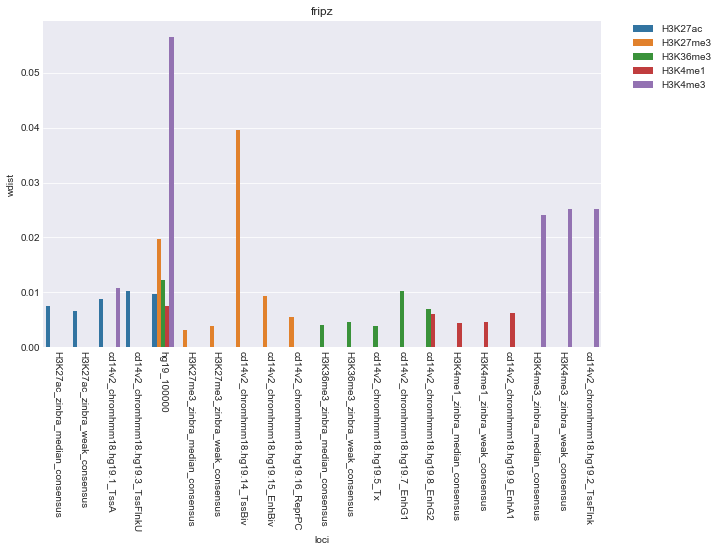

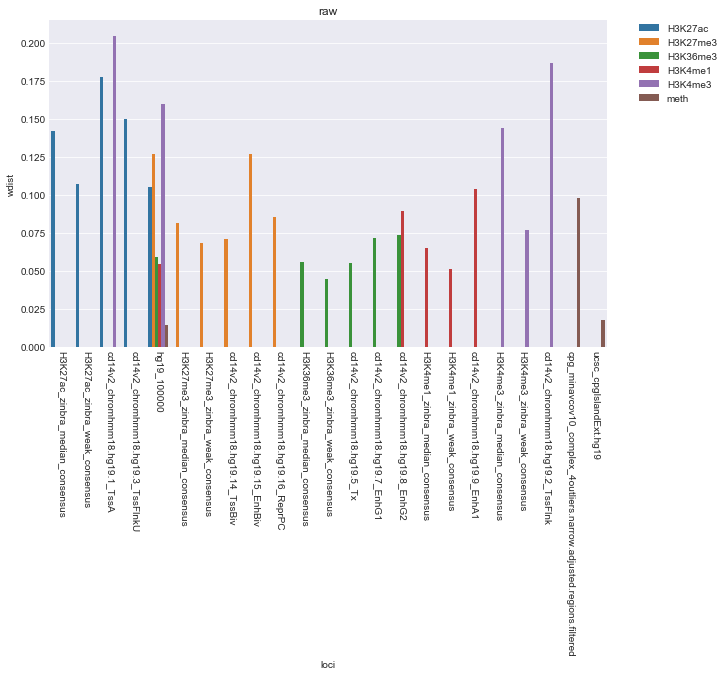

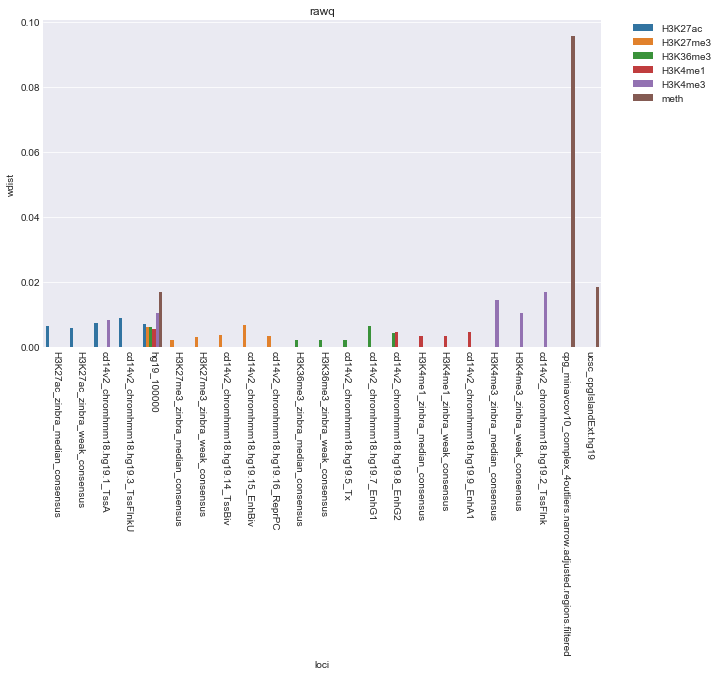

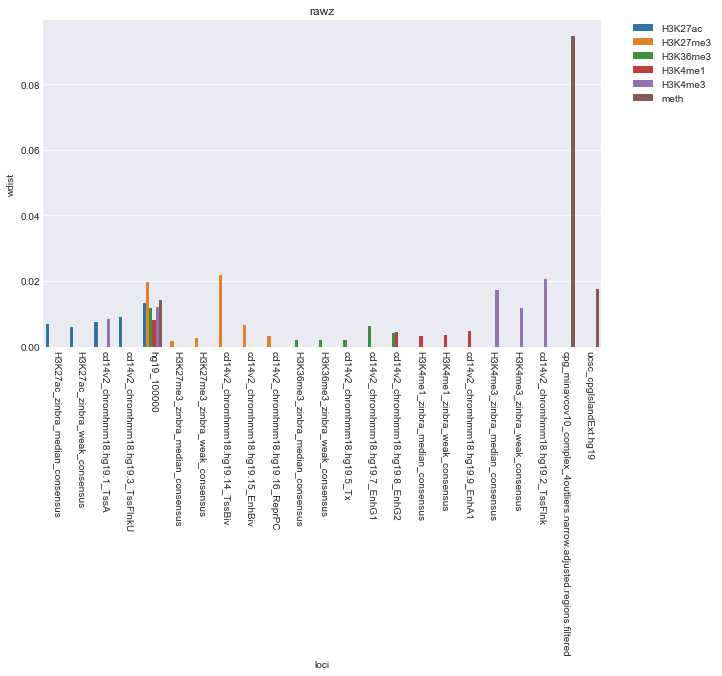

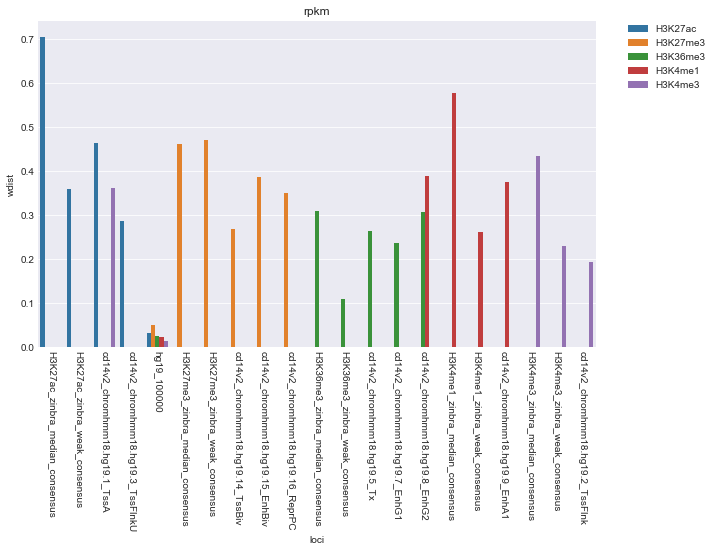

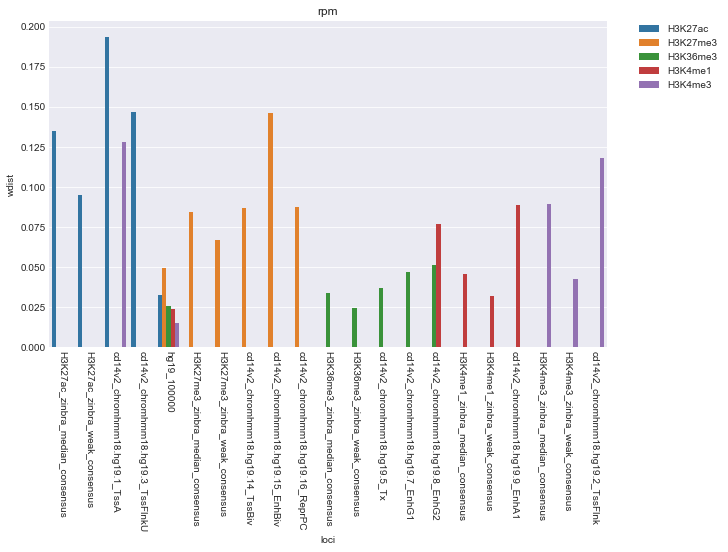

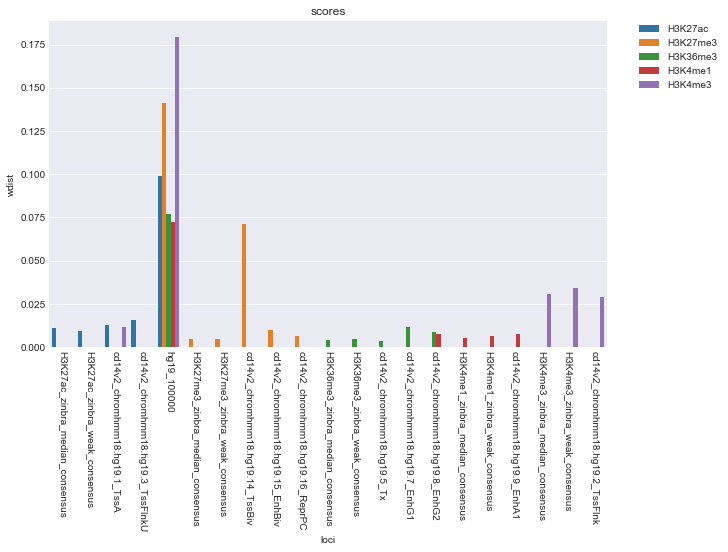

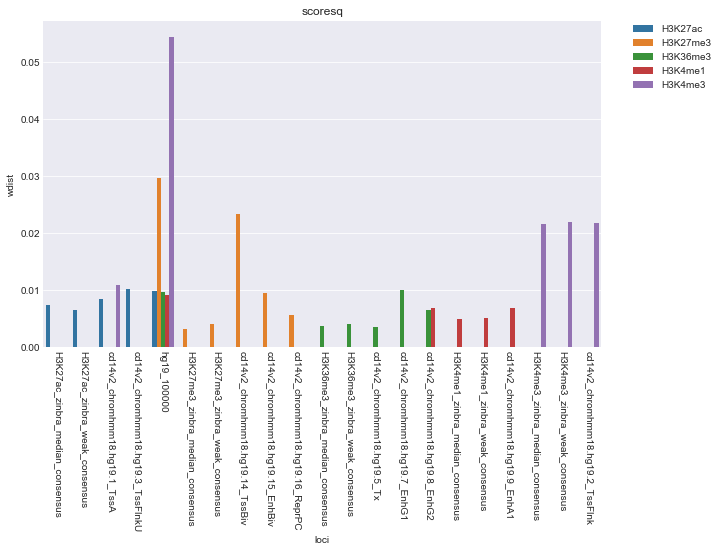

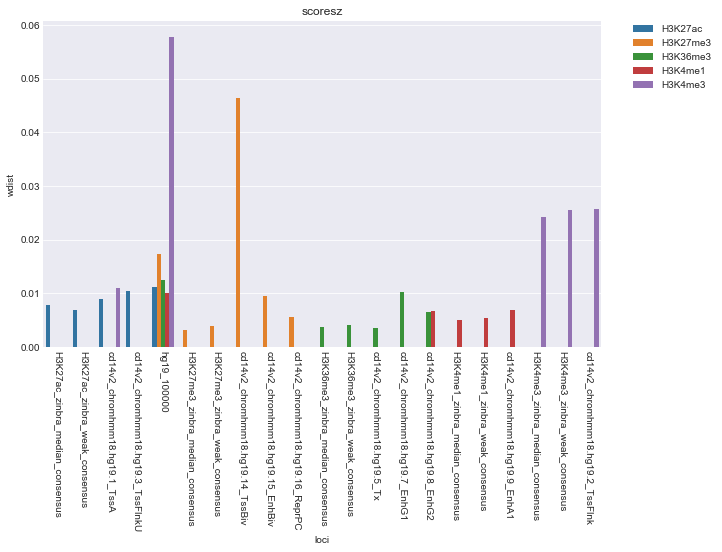

In [12]:
norms = sorted(set(df["normalization"]))
for metric in ["mean", "p2", "wdist"]:
    for norm in norms:
        plt.figure(figsize=(10,6))
        g = sns.barplot(data=df[df["normalization"] == norm], y=metric, x="loci", hue="modification")
        for item in g.get_xticklabels():
            item.set_rotation(-90)
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        #plt.yscale("log")
        plt.title(norm)
        plt.show()

So: "rawq", "fripz" or "fripm"

# H3K27me3 + DiffBind scores options

In [3]:
signals_root = Path("/mnt/stripe/bio/experiments/k27me3@dmrs")
paths = [p for p in signals_root.glob("k*_counts.csv")]
[p.name for p in paths]

['k27me3@dmrs_dedup_TRUE_f_125_DBA_SCORE_READS_FOLD_counts.csv',
 'k27me3@dmrs_dedup_TRUE_f_125_DBA_SCORE_RPKM_FOLD_counts.csv',
 'k27me3@dmrs_dedup_TRUE_f_125_DBA_SCORE_READS_counts.csv',
 'k27me3@dmrs_dedup_TRUE_f_125_DBA_SCORE_READS_MINUS_counts.csv',
 'k27me3@dmrs_dedup_TRUE_f_125_DBA_SCORE_RPKM_counts.csv',
 'k27me3@dmrs_dedup_TRUE_f_125_DBA_SCORE_TMM_READS_FULL_counts.csv',
 'k27me3@dmrs_dedup_TRUE_f_125_DBA_SCORE_TMM_READS_EFFECTIVE_counts.csv',
 'k27me3@dmrs_dedup_TRUE_f_125_DBA_SCORE_TMM_MINUS_FULL_counts.csv',
 'k27me3@dmrs_dedup_TRUE_f_125_DBA_SCORE_TMM_MINUS_EFFECTIVE_counts.csv',
 'k27me3@dmrs_dedup_TRUE_f_125_DBA_SCORE_TMM_READS_FULL_CPM_counts.csv',
 'k27me3@dmrs_dedup_TRUE_f_125_DBA_SCORE_TMM_READS_EFFECTIVE_CPM_counts.csv',
 'k27me3@dmrs_dedup_TRUE_f_125_DBA_SCORE_TMM_MINUS_FULL_CPM_counts.csv',
 'k27me3@dmrs_dedup_TRUE_f_125_DBA_SCORE_TMM_MINUS_EFFECTIVE_CPM_counts.csv',
 'k27me3@dmrs_dedup_FALSE_f_125_DBA_SCORE_READS_counts.csv',
 'k27me3@dmrs_dedup_FALSE_f_125_DBA_S

In [4]:
output_path = signals_root / "validate.norms.permutation_r2.{}.csv".format(simulations)
output_path

print(str(output_path), "[exists]" if output_path.exists() else "[not exists]")

/mnt/stripe/bio/experiments/k27me3@dmrs/validate.norms.permutation_r2.100001.csv [not exists]


In [5]:
if not output_path.exists():
    process(paths, str(output_path), seed=100, simulations=simulations, threads=threads)
print("Results file: ", str(output_path))

--- [1 / 52] -----------
Process: /mnt/stripe/bio/experiments/k27me3@dmrs/k27me3@dmrs_dedup_TRUE_f_125_DBA_SCORE_READS_FOLD_counts.csv
mean = 0.876946308073584, median = 0.9088608299331994, [min, max] = [-0.6532947644833222, 0.9795135330213498], [2%, 5%, 10%, 98%] = [0.4584483107903483, 0.6828700950570556, 0.7851950035352563, 0.9687738570345481], wd = 0.17905376944049356
--- [2 / 52] -----------
Process: /mnt/stripe/bio/experiments/k27me3@dmrs/k27me3@dmrs_dedup_TRUE_f_125_DBA_SCORE_RPKM_FOLD_counts.csv
mean = 0.8688935854629128, median = 0.9023408095396481, [min, max] = [-0.6160764886591312, 0.9780828440443476], [2%, 5%, 10%, 98%] = [0.49067264316327575, 0.6549551850351405, 0.7585683238152774, 0.9667490676250501], wd = 0.18526205296152698
--- [3 / 52] -----------
Process: /mnt/stripe/bio/experiments/k27me3@dmrs/k27me3@dmrs_dedup_TRUE_f_125_DBA_SCORE_READS_counts.csv
mean = 0.8718365487035007, median = 0.9320045721908288, [min, max] = [-1.0104674088598644, 0.9852211038889295], [2%, 5%, 

--- [23 / 52] -----------
Process: /mnt/stripe/bio/experiments/k27me3@dmrs/k27me3@dmrs_dedup_FALSE_f_125_DBA_SCORE_TMM_READS_FULL_CPM_counts.csv
mean = 0.9156919786970041, median = 0.93934056591928, [min, max] = [-0.11939059322216061, 0.9835914417632508], [2%, 5%, 10%, 98%] = [0.6351937323273174, 0.7748663295204686, 0.8480070364706274, 0.976695288302062], wd = 0.12400814622167142
--- [24 / 52] -----------
Process: /mnt/stripe/bio/experiments/k27me3@dmrs/k27me3@dmrs_dedup_FALSE_f_125_DBA_SCORE_TMM_READS_EFFECTIVE_CPM_counts.csv
mean = 0.9093661669246393, median = 0.9379368020532315, [min, max] = [-0.09869339835393776, 0.9842582901099755], [2%, 5%, 10%, 98%] = [0.5390631170681599, 0.7453570236988438, 0.8283756531223282, 0.9769876743079315], wd = 0.1376815840645988
--- [25 / 52] -----------
Process: /mnt/stripe/bio/experiments/k27me3@dmrs/k27me3@dmrs_dedup_FALSE_f_125_DBA_SCORE_TMM_MINUS_FULL_CPM_counts.csv
mean = 0.7294494312666161, median = 0.8908991050393528, [min, max] = [-5.587617445

--- [45 / 52] -----------
Process: /mnt/stripe/bio/experiments/k27me3@dmrs/k27me3@dmrs_dedup_FALSE_f_150_DBA_SCORE_TMM_READS_FULL_counts.csv
mean = 0.9209869537853221, median = 0.9422552416895763, [min, max] = [0.22693558659664015, 0.9849794430741793], [2%, 5%, 10%, 98%] = [0.6375666893024712, 0.789631180773567, 0.853039602996769, 0.9774566455986243], wd = 0.11163406781406798
--- [46 / 52] -----------
Process: /mnt/stripe/bio/experiments/k27me3@dmrs/k27me3@dmrs_dedup_FALSE_f_150_DBA_SCORE_TMM_READS_EFFECTIVE_counts.csv
mean = 0.9266898847353843, median = 0.943623902483868, [min, max] = [0.30616573070880504, 0.9840916693233119], [2%, 5%, 10%, 98%] = [0.7078174637907396, 0.8196486329716435, 0.8699622668814232, 0.9775953804102011], wd = 0.09796278791973943
--- [47 / 52] -----------
Process: /mnt/stripe/bio/experiments/k27me3@dmrs/k27me3@dmrs_dedup_FALSE_f_150_DBA_SCORE_TMM_MINUS_FULL_counts.csv
mean = 0.865592712952894, median = 0.9144034850974434, [min, max] = [-1.0030437160126255, 0.980

In [27]:
df = pd.DataFrame.from_csv(output_path, index_col=None)
print("Shape:", df.shape)
df = df.drop(["modification", "file", "p5", "p10"],axis=1).sort_values(by="wdist")
df

Shape: (52, 9)


,normalization,mean,median,p2,wdist
49,k27me3@dmrs_dedup_TRUE_f_150_DBA_SCORE_TMM_REA...,0.939699,0.948693,0.824615,0.072461
48,k27me3@dmrs_dedup_TRUE_f_150_DBA_SCORE_TMM_REA...,0.939699,0.948693,0.824615,0.072461
38,k27me3@dmrs_dedup_TRUE_f_125_DBA_SCORE_TMM_REA...,0.940425,0.951349,0.803469,0.073787
37,k27me3@dmrs_dedup_TRUE_f_125_DBA_SCORE_TMM_REA...,0.940425,0.951349,0.803469,0.073787
50,k27me3@dmrs_dedup_TRUE_f_150_DBA_SCORE_TMM_REA...,0.936514,0.949965,0.773090,0.082518
51,k27me3@dmrs_dedup_TRUE_f_150_DBA_SCORE_TMM_REA...,0.936514,0.949965,0.773090,0.082518
36,k27me3@dmrs_dedup_TRUE_f_125_DBA_SCORE_TMM_REA...,0.933105,0.949470,0.748672,0.090379
35,k27me3@dmrs_dedup_TRUE_f_125_DBA_SCORE_TMM_REA...,0.933105,0.949470,0.748672,0.090379
22,k27me3@dmrs_dedup_FALSE_f_150_DBA_SCORE_TMM_RE...,0.926690,0.943624,0.707817,0.097963
23,k27me3@dmrs_dedup_FALSE_f_150_DBA_SCORE_TMM_RE...,0.926690,0.943624,0.707817,0.097963


In [29]:
for i, r in df.iterrows():
    print("[{}] mean={}, p2={}, wdist={}".format(r.normalization, str(r[1]), str(r.p2), str(r.wdist)))

[k27me3@dmrs_dedup_TRUE_f_150_DBA_SCORE_TMM_READS_EFFECTIVE_counts.csv] mean=0.9396991878532692, p2=0.8246149306455011, wdist=0.07246115751791415
[k27me3@dmrs_dedup_TRUE_f_150_DBA_SCORE_TMM_READS_EFFECTIVE_CPM_counts.csv] mean=0.9396986861681312, p2=0.8246149306455008, wdist=0.07246148087699615
[k27me3@dmrs_dedup_TRUE_f_125_DBA_SCORE_TMM_READS_FULL_counts.csv] mean=0.9404248292550892, p2=0.8034691375207809, wdist=0.07378723299712757
[k27me3@dmrs_dedup_TRUE_f_125_DBA_SCORE_TMM_READS_FULL_CPM_counts.csv] mean=0.940424731874318, p2=0.8034691375207812, wdist=0.07378727341910117
[k27me3@dmrs_dedup_TRUE_f_150_DBA_SCORE_TMM_READS_FULL_CPM_counts.csv] mean=0.936513834626708, p2=0.7730897859496428, wdist=0.08251848991516278
[k27me3@dmrs_dedup_TRUE_f_150_DBA_SCORE_TMM_READS_FULL_counts.csv] mean=0.936513834626708, p2=0.7730897859496425, wdist=0.0825184899151629
[k27me3@dmrs_dedup_TRUE_f_125_DBA_SCORE_TMM_READS_EFFECTIVE_counts.csv] mean=0.9331046240868732, p2=0.7486716752679845, wdist=0.09037891